In [67]:
import numpy as np
import os
import matplotlib.pyplot as plt
from netCDF4 import num2date
import netCDF4 as nc

In [82]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Leer datos de HYCOM netCDF
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Abrir el archivo netCDF
# Identificar el nombre del archivo netCDF
resources_path = "../resources/"
catalogo = [f for f in os.listdir("../resources/") if f.startswith('h') and f.endswith('.nc4')]
if not catalogo:
    raise FileNotFoundError("No se encontraron archivos .nc en la carpeta 'resources'.")
file_name = os.path.join(resources_path, catalogo[1])
file_name

'../resources/hindcasts_2022_3.nc4'

In [104]:
# Leer datos 
ds = nc.Dataset(file_name)

# Extraer variables

Lat     = ds.variables['lat'][:]
Lon     = ds.variables['lon'][:]
u       = ds.variables['water_u'][:]
u       = np.squeeze(u)
v       = ds.variables['water_v'][:]
v       = np.squeeze(v)
temp    = ds.variables['water_temp'][:]
temp    = np.squeeze(temp)
sal     = ds.variables['salinity'][:]
sal     = np.squeeze(sal)
tHY     = ds.variables['time'][:]

In [105]:
# Generar tiempo en Python
t1 = np.datetime64('2000-12-31T00:00:00')  # Para los hindcasts horarios
time_units = ds.variables['time'].units
t = num2date(tHY, units=time_units)

Text(0, 0.5, 'Latitud')

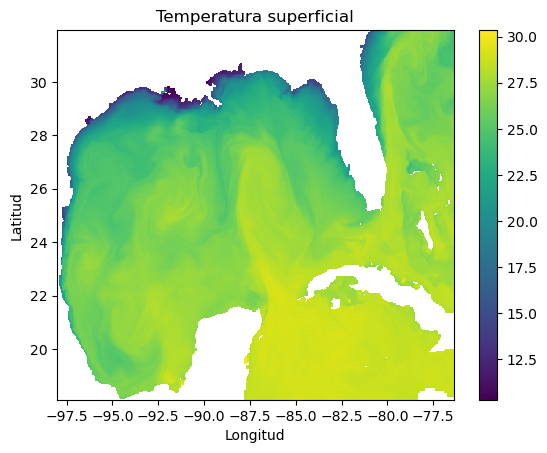

In [108]:
t1# Gráfico de temperatura superficial
plt.figure()
plt.pcolor(Lon, Lat, temp[0, :, :], shading='auto').set_array(temp[0, :, :])
plt.colorbar()
plt.title('Temperatura superficial')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

In [72]:
# Generar matrices de velocidades y otros datos
U = np.zeros((len(Lat)*len(Lon), len(t)))
V = np.zeros_like(U)
Temp = np.zeros_like(U)
Sal = np.zeros_like(U)

for i in range(len(t)):
    U[:, i] = u[i, :, :].T.ravel()
    V[:, i] = v[i, :, :].T.ravel()
    Temp[:, i] = temp[i, :, :].T.ravel()
    Sal[:, i] = sal[i, :, :].T.ravel()

In [73]:
# Calculo de matriz promedio
Uprom = np.mean(U, axis=1)
Upd = Uprom.reshape(len(Lat), len(Lon))

Vprom = np.mean(V, axis=1)
Vpd = Vprom.reshape(len(Lat), len(Lon))

Vel = np.sqrt(Upd**2 + Vpd**2)

Tprom = np.mean(Temp, axis=1)
Temp1 = Tprom.reshape(len(Lat), len(Lon))

Sprom = np.mean(Sal, axis=1)
Sal1 = Sprom.reshape(len(Lat), len(Lon))

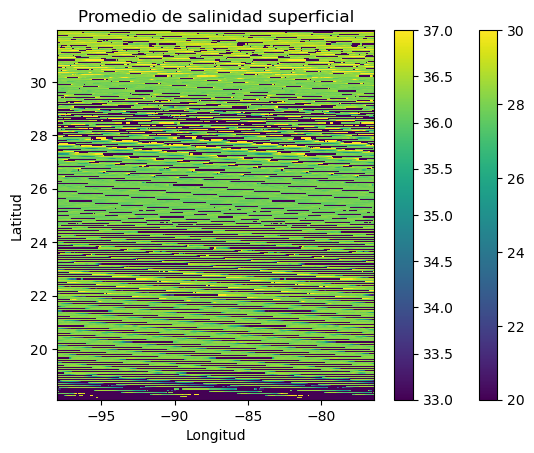

In [109]:
# Gráficas
plt.figure()
plt.pcolor(Lon, Lat, Temp1, shading='auto')
plt.colorbar()
plt.title('Promedio de temperatura superficial')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.clim(20, 30)

# plt.figure()
plt.pcolor(Lon, Lat, Sal1, shading='auto')
plt.colorbar()
plt.title('Promedio de salinidad superficial')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.clim(33, 37)

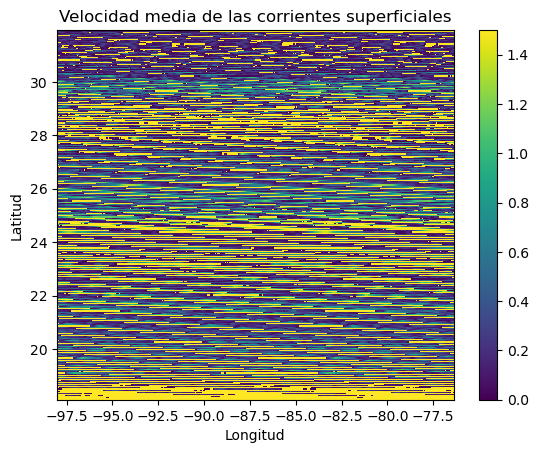

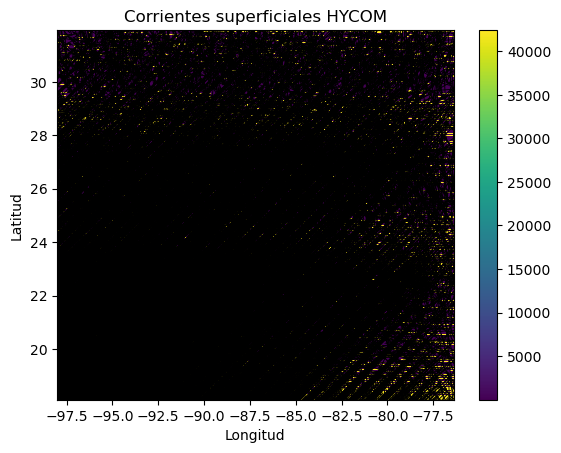

In [75]:
plt.figure()
plt.pcolor(Lon, Lat, Vel, shading='auto')
plt.colorbar()
plt.title('Velocidad media de las corrientes superficiales')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.clim(0, 1.5)
plt.show()

# Graficar vectores
LO, LA = np.meshgrid(Lon, Lat)
X = LO.ravel()
a = np.arange(0, len(X), 18)

plt.figure()
plt.pcolor(Lon, Lat, Vel, shading='auto')
plt.colorbar()
plt.quiver(LO.ravel()[a], LA.ravel()[a], Upd.ravel()[a], Vpd.ravel()[a], scale=3, color='k')
plt.title('Corrientes superficiales HYCOM')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()
